# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

#Adding datatime dependency to be able to get the current date each time code is run
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Import pprint
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [50]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countrycode=[]
city_country=[]

# Create a set of random lat and lng combinations.  We only want 500 cities, however, we have to start with
# a much higher number of random latitudes, longitudes as citipy won't necessarily find a city nearby and
# even it does, the particular city may not be in Open Weather.  We also could get the same city multiple times and 
# if we do, it is only included once.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination from citipy
# Also identify the country, so  more precise API call can be made later

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countrycode.append(country)
        
# concatenate the city and country code which will be used in the API call
# including the country should get a more precise API call
for i in range(len(cities)):
    city_country.append(cities[i] + "," + countrycode[i])

len(city_country)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [51]:
# define the base URL and the units to be pulled.  These will be used in the API call

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define several list and a counter variable which will all be used below

cityname=[]
temp=[]
clouds=[]
windspd=[]
humidity=[]
country_code=[]
latitude=[]
counter=0

# Now run through the list of cities (including country) and pass the city, country code to Open Weather API

for city in city_country:

    # create the query for the current city, country and pass the request to the API
    # format the respon as JSON
    
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    # Here I use and exception clause to print the city name and country if it was found in Open Weather
    # If it wasn't in Open Weather, I print that the city, country wasn't found
    
    try:
        print(f"The city being processed is: {weather_json['name']}, {weather_json['sys']['country']}.  The city ID is: {weather_json['id']}")
    except KeyError:
        print(f"The thriving metropolis of {city} was not found in Open Weather")
     
    # Here I test if the city was found using the status_code.  If it was I add values to a number of lists
                  
    if weather_response.status_code == 200:
        cityname.append(weather_json['name'])
        country_code.append(weather_json['sys']['country'])
        temp.append(weather_json['main']['temp_max'])
        clouds.append(weather_json['clouds']['all'])
        windspd.append(weather_json['wind']['speed'])
        humidity.append(weather_json['main']['humidity'])
        latitude.append(weather_json['coord']['lat'])
    counter=counter+1              

# Here I define the current date by this datetime function and then extracting the month, day, year
# to create a sting that shows the date, which will be used in chart titles
                  
current_time=datetime.datetime.now()
date=f'{current_time.month}/{current_time.day}/{current_time.year}'

# Here I check the number of cities that were returned by the API to make sure I had more than 500
totcities=len(cityname)
print()
print(f'The Total Number of cities is:  {totcities}')

The thriving metropolis of samusu,ws was not found in Open Weather
The city being processed is: Tuktoyaktuk, CA.  The city ID is: 6170031
The city being processed is: Chuy, UY.  The city ID is: 3443061
The city being processed is: Port Hedland, AU.  The city ID is: 2063042
The city being processed is: Atuona, PF.  The city ID is: 4020109
The city being processed is: Gasa, BT.  The city ID is: 1252578
The city being processed is: Port Alfred, ZA.  The city ID is: 964432
The city being processed is: Guerrero Negro, MX.  The city ID is: 4021858
The thriving metropolis of tsihombe,mg was not found in Open Weather
The city being processed is: Vaini, TO.  The city ID is: 4032243
The city being processed is: Ahipara, NZ.  The city ID is: 2194098
The city being processed is: Puerto Leguizamo, CO.  The city ID is: 3671437
The city being processed is: Santo Antonio do Sudoeste, BR.  The city ID is: 3449479
The thriving metropolis of tumannyy,ru was not found in Open Weather
The city being proces

The city being processed is: Olinda, BR.  The city ID is: 3456160
The city being processed is: Thompson, CA.  The city ID is: 6165406
The city being processed is: Zhigansk, RU.  The city ID is: 2012530
The city being processed is: Norman Wells, CA.  The city ID is: 6089245
The city being processed is: San Patricio, MX.  The city ID is: 3985168
The city being processed is: Kruisfontein, ZA.  The city ID is: 986717
The city being processed is: Port Lincoln, AU.  The city ID is: 2063036
The city being processed is: Fortuna, US.  The city ID is: 5563839
The thriving metropolis of louisbourg,ca was not found in Open Weather
The city being processed is: New Norfolk, AU.  The city ID is: 2155415
The city being processed is: Ialibu, PG.  The city ID is: 2095925
The city being processed is: Eqbaliyeh, IR.  The city ID is: 406993
The thriving metropolis of barentsburg,sj was not found in Open Weather
The city being processed is: Upernavik, GL.  The city ID is: 3418910
The city being processed is

The city being processed is: Kisangani, CD.  The city ID is: 212730
The city being processed is: Kouango, CF.  The city ID is: 2385535
The city being processed is: Flinders, AU.  The city ID is: 6255012
The city being processed is: Leningradskiy, RU.  The city ID is: 2123814
The city being processed is: Sitka, US.  The city ID is: 4267710
The city being processed is: Mount Isa, AU.  The city ID is: 2065594
The city being processed is: Buala, SB.  The city ID is: 2109528
The city being processed is: Xiuyan, CN.  The city ID is: 2033602
The city being processed is: Khandyga, RU.  The city ID is: 2022773
The city being processed is: Carnarvon, AU.  The city ID is: 2074865
The city being processed is: Saldanha, ZA.  The city ID is: 3361934
The city being processed is: Jalu, LY.  The city ID is: 86049
The city being processed is: Pucallpa, PE.  The city ID is: 3693345
The city being processed is: Muisne, EC.  The city ID is: 3653967
The city being processed is: Marolambo, MG.  The city ID i

The city being processed is: Ucluelet, CA.  The city ID is: 6171633
The city being processed is: Izhevskoye, RU.  The city ID is: 554836
The city being processed is: Novonukutskiy, RU.  The city ID is: 2015469
The thriving metropolis of avera,pf was not found in Open Weather
The city being processed is: Roros, NO.  The city ID is: 3141332
The city being processed is: Lexington Park, US.  The city ID is: 4360592
The city being processed is: Cajazeiras, BR.  The city ID is: 3404020
The city being processed is: Poltar, SK.  The city ID is: 3058083
The city being processed is: Mocuba, MZ.  The city ID is: 1024312
The city being processed is: Khuzdar, PK.  The city ID is: 7082481
The city being processed is: Nantucket, US.  The city ID is: 4944903
The city being processed is: Seminole, US.  The city ID is: 5530452
The city being processed is: Bima, ID.  The city ID is: 1648759
The city being processed is: Meulaboh, ID.  The city ID is: 1214488
The city being processed is: Novyy Urengoy, RU.

The city being processed is: Bodden Town, KY.  The city ID is: 3580733
The city being processed is: Takoradi, GH.  The city ID is: 2294915
The city being processed is: Banda Aceh, ID.  The city ID is: 1215502
The city being processed is: Xam Nua, LA.  The city ID is: 1652203
The city being processed is: Bouna, CI.  The city ID is: 2290849
The thriving metropolis of ler,sd was not found in Open Weather
The thriving metropolis of doha,kw was not found in Open Weather
The city being processed is: Hornepayne, CA.  The city ID is: 5977046
The city being processed is: Rundu, NA.  The city ID is: 3353383
The city being processed is: Tahta, EG.  The city ID is: 347634
The city being processed is: Oytal, KZ.  The city ID is: 1520281
The city being processed is: Amuntai, ID.  The city ID is: 1651461
The city being processed is: Atar, MR.  The city ID is: 2381334
The city being processed is: Manzanillo, MX.  The city ID is: 3996663
The thriving metropolis of krasnoselkup,ru was not found in Open 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
# Create a dictionary from the lists that were created above

weather_dict = {
    'city' : cityname,
    'country' : country_code,
    'latitude' : latitude,
    'temp' : temp,
    'clouds' : clouds,
    'windspd' : windspd,
    'humidity' : humidity
}

# Create a datafram from the dictionary

weather_data=pd.DataFrame(weather_dict)

# Here I print city(s) with a very high wind speed which I will discuss in my description

print(weather_data[weather_data['windspd'] > 50])

# Output the list of cities, along with the data captured for each into a csv file

weather_data.to_csv(output_data_file)

weather_data.head()

         city country  latitude   temp  clouds  windspd  humidity
274  Tasiilaq      GL     65.61  33.82     100    54.29        97


,city,country,latitude,temp,clouds,windspd,humidity
0,Tuktoyaktuk,CA,69.44,-7.60,40,6.93,76
1,Chuy,UY,-33.69,68.56,0,12.64,76
2,Port Hedland,AU,-20.31,80.60,7,8.05,19
3,Atuona,PF,-9.80,80.24,21,13.69,72
4,Gasa,BT,27.91,24.42,0,1.14,67


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

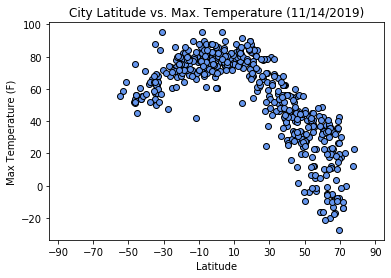

In [58]:
#Plot the latitude vs. temperature 

fig, ax = plt.subplots()

plt.scatter(latitude, temp, color='cornflowerblue' , edgecolors='black')

# Here I set some chart attributes.  Note that I fix the xaxis ticks and range as we know the absolute range of the latitude
# But I let the yaxis range and ticks be set based on the data, since this range would change depending on the sample
# and time of year that code was run

plt.xticks(np.arange(-90, 100, 20))
plt.xlim(-95, 95)
plt.title(f'City Latitude vs. Max. Temperature ({date})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')

# Save the chart as a .png file

fig.savefig('temperature_plot.png')

#### Latitude vs. Humidity Plot

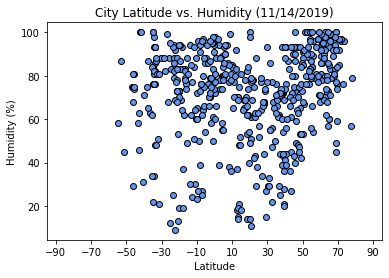

In [59]:
#Plot the latitude vs. temperature 

fig, ax = plt.subplots()

plt.scatter(latitude, humidity,color='cornflowerblue' , edgecolors='black')

# Here I set some chart attributes.  Note that I fix the xaxis ticks and range as we know the absolute range of the latitude
# But I let the yaxis range and ticks be set based on the data, since this range would change depending on the sample
# and time of year that code was run

plt.xticks(np.arange(-90, 100, 20))
plt.xlim(-95, 95)
plt.title(f'City Latitude vs. Humidity ({date})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')

# Save the chart as a .png file

fig.savefig('humidity_plot.png')

#### Latitude vs. Cloudiness Plot

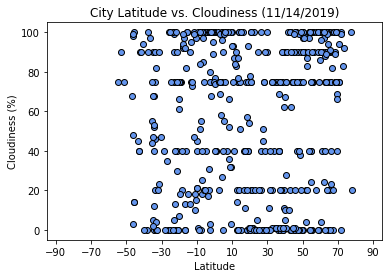

In [60]:
#Plot the latitude vs. temperature 

fig, ax = plt.subplots()

plt.scatter(latitude, clouds, color='cornflowerblue' , edgecolors='black')

# Here I set some chart attributes.  Note that I fix the xaxis ticks and range as we know the absolute range of the latitude
# But I let the yaxis range and ticks be set based on the data, since this range would change depending on the sample
# and time of year that code was run

plt.xticks(np.arange(-90, 100, 20))
plt.xlim(-95, 95)
plt.title(f'City Latitude vs. Cloudiness ({date})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')

# Save the chart as a .png file

fig.savefig('clouds_plot.png')

#### Latitude vs. Wind Speed Plot

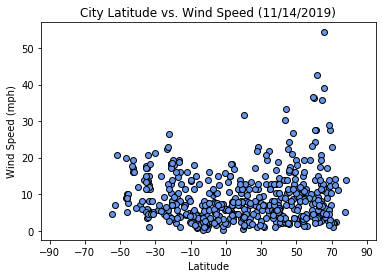

In [61]:
#Plot the latitude vs. temperature 

fig, ax = plt.subplots()

plt.scatter(latitude, windspd, color='cornflowerblue' , edgecolors='black')

# Here I set some chart attributes.  Note that I fix the xaxis ticks and range as we know the absolute range of the latitude
# But I let the yaxis range and ticks be set based on the data, since this range would change depending on the sample
# and time of year that code was run

plt.xticks(np.arange(-90, 100, 20))
plt.xlim(-95, 95)
plt.title(f'City Latitude vs. Wind Speed ({date})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')

# Save the chart as a .png file

fig.savefig('wind_plot.png')